<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Multi-Variable Logistic Regression and Classification Matrix

_Authors: Sam Stack(DC)_



**Exercise Objectives**
- Hand on experience using Multi-Variable Logistic Regression
- Review and Exploration of the Classification Matrix and its evaluation Metrics
- Introduction to One vs. One and One vs. Rest Classifiers.

**Lets get some data.**
One of the most popular classification datasets for Machine learning is the Iris Dataset, which can be loaded directly from `sklearn.datasets`
- Sklearn datasets are imported as dictionaries and use keys to access specific aspects.
    - `iris.data` : actual matrix of observations
    - `iris.target` : target column for classification
    - `iris.feature_names` :  column names

In [1]:
import seaborn as sns
import pandas as pd
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = iris.target

In [2]:
# Examine the data
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Break down of classes**  
0 : Setosa  
1 : Versicolour  
2 : Virginica  

----

**Modeling**
This data is extremely neat and tidy so no cleaning necessary and we can get right into modeling.

In [3]:
# model the data, use a cross validation technique as well
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(X,y)

lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
# model.predict
y_pred = lr.predict(x_test)

In [5]:
# evaluated model preformance with a confusion matrix.
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 13,  3],
       [ 0,  0,  9]])

With a multivariable confusion matrix, some of our labellings (True Pos., True Neg., False Pos., False Neg.) get a little warped.  We are not longer predicting one class from a null class we are classifying into 3 distinguished classes.  

The **True** diagonal stays the same as these are properly classified observations.  


|     | Class 0 | Class 1  | Class 2 |
| --- | ------- |:--------:| -------:|
| **Pred Class 0**  | 15      | 0        | 0       |
| **Pred Class 1**    | 0       | 11       |   0     |
| **Pred Class 2**    | 0       | 1        |    11   |


It is better to stick with True and False labels with multi-class to avoid ...[_Confusion_](https://www.youtube.com/watch?v=bcYppAs6ZdI)

If you need to refer to a False Positive or True Negative it is better to first select a specific class, such as `Class 2 ` and refer to classification or mis-classification relative to said chosen class instead of the set of all classes as a whole. 

Example:
    _True Negatives relative to Class 2 are True Positives for Class 0 and Class 1._

Speaking of our Classes?  How are probabilities calculated with multi class?
- Are they Probability of `Class 0` vs. `Not Class 0`?
- Or Probability of `Class 0` vs. `Class 1` vs. `Class 2` ?

In [6]:
# use predict_proba to find out.
lr.predict_proba(x_test)

array([[8.58797004e-01, 1.41147620e-01, 5.53762699e-05],
       [1.60879159e-02, 5.09679698e-01, 4.74232386e-01],
       [2.99729059e-01, 6.21676378e-01, 7.85945624e-02],
       [2.06095948e-01, 6.31440111e-01, 1.62463941e-01],
       [5.62956228e-02, 5.40469434e-01, 4.03234944e-01],
       [6.87516431e-02, 7.75554178e-01, 1.55694179e-01],
       [1.79994261e-02, 3.68888322e-01, 6.13112252e-01],
       [5.37626747e-04, 2.37650549e-01, 7.61811824e-01],
       [2.92127135e-02, 8.29167865e-01, 1.41619422e-01],
       [8.91748971e-01, 1.08216731e-01, 3.42976733e-05],
       [5.32329525e-02, 7.59348369e-01, 1.87418678e-01],
       [1.37624632e-01, 6.90497431e-01, 1.71877937e-01],
       [2.24727769e-03, 3.66230099e-01, 6.31522623e-01],
       [8.39629309e-01, 1.60166977e-01, 2.03714545e-04],
       [9.20052862e-01, 7.99211166e-02, 2.60210360e-05],
       [5.23641904e-03, 2.57006748e-01, 7.37756833e-01],
       [8.21411508e-01, 1.78463710e-01, 1.24781635e-04],
       [8.06204562e-01, 1.93575

In [7]:
for a,b,c in lr.predict_proba(x_test):
    print(sum([a,b,c]))

1.0000000000000002
1.0
1.0
1.0000000000000002
1.0
1.0
1.0
0.9999999999999999
1.0
0.9999999999999998
0.9999999999999998
0.9999999999999999
1.0000000000000002
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0000000000000002
1.0


Looks like our probabilities of each class all add up to 1, so it is like `Class 0` vs. `Class 1` vs. `Class 2`.

What if we wanted to create a logistic regression that has `Class 0` vs. `Class 1` & `Class 2` or just `Class 0` vs. `Class 2`?  We will cover that in a bit, but first more evaluation metrics.

---

**Classification Reports/Matrix**

Classification reports are another means of evaluation classification models and return a few metrics that are based on True Positives, False Positives and False Negatives.  

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.81      0.90        16
          2       0.75      1.00      0.86         9

avg / total       0.94      0.92      0.92        38



**Precision**  
- "How many of the items selected are relevant."
- Of the items placed into a class, how many of the are True Positives.


$$\frac{True Positives}{True Positives + False Positives}$$

**Recall**  
- "How many of the relevant items are selected."
- Of the items that were suppose to be placed into a class, how many did we accurately place.


$$\frac{True Positives}{True Positives + False Negatives}$$

**F1-Score**

F1 exists on a range of 0 - 1 where 0 is just awful and 1 is perfect.
F1 is considered a harmonic mean as it averages Precision and Recall.  With classification models you often times have to choose what kind of error you are willing to increase in order to reduce the other and thus you may want to optimize Precision or Recall accordingly.  If you are uncertain which you should optimize, F1 score may be the metric of choice.

$$2*\frac{precision * recall}{precision + recall}$$

**Support**
Number of true observations in given class.  The count of possible true observations.  

---



Earlier we talked about building models relative to class combinations.  Distinguishing One class from all other classes or just One specific class from another specific class.  These goals are possible with Logistic Regression.

Up until this point we have used one model, but there are also Machine Learning methods that involve combining several models to come to a more refined conclusion, commonly referred to as Ensemble Methods.

### One Vs. Rest Classification.

One vs. Rest Classification is a method that builds an individual model for each class to try to distinguish said specific class from the rest of the classes.  Since we are only focusing on one class, `Class 1` these classifiers will group `Class2`, `Class3`, `Class4` into a single class of `Not Class 1`.  Same all the way through for the rest of the classes.

1 - Class1 vs. Class2, Class3, Class4  
2 - Class2 vs. Class1, Class3, Class4  
3 - Class3 vs. Class1, Class2, Class4   
4 - Class4 vs. Class1, Class2, Class3  

### One Vs. One Classification.

We train a model for every set of classes.  As more classes are added this becomes more computationally expense.  

1 - Class1 vs. Class2  
2 - Class1 vs. Class3  
3 - Class1 vs. Class4  
4 - Class2 vs. Class3  
5 - Class2 vs. Class4  
6 - Class3 vs. Class4  


#### One Vs. Rest Classifier

In [9]:
from sklearn.multiclass import OneVsRestClassifier
LR = LogisticRegression()
OVC = OneVsRestClassifier(LR)
OVC.fit(x_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [10]:
y_pred = OVC.predict(x_test)

confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 13,  3],
       [ 0,  0,  9]])

#### One Vs. One Classifier

In [11]:
from sklearn.multiclass import OneVsOneClassifier
LR = LogisticRegression()
OVO = OneVsOneClassifier(LR)
OVO.fit(x_train,y_train)

OneVsOneClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [12]:
y_pred = OVO.predict(x_test)

confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

One Vs. One/Rest Classifiers are not restricted to fitting using Logistic Regression.  With SKLearn, any type of Classification model can be placed into the One Vs X classification ensemble.

## ROC Curves
[Source1](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)
[Source2](https://www.medcalc.org/manual/roc-curves.php)

When you consider the results of a particular test in two populations, one population with a disease, the other population without the disease, you will rarely observe a perfect separation between the two groups. Indeed, the distribution of the test results will overlap, as shown in the following figure.

<img src="https://www.medcalc.org/manual/_help/images/roc_intro1.png" style="width: 350px;"/>

For every possible cut-off point or criterion value you select to discriminate between the two populations, there will be some cases with the disease correctly classified as positive (TP = True Positive fraction), but some cases with the disease will be classified negative (FN = False Negative fraction). On the other hand, some cases without the disease will be correctly classified as negative (TN = True Negative fraction), but some cases without the disease will be classified as positive (FP = False Positive fraction).

$$True Positive Rate = TP/Positive = 1 - False Negative Rate$$

$$False Postive Rate = FP/Negative = 1 - True Negative Rate$$

The ROC curve is a useful tool for a few reasons:

- The curves of different models can be compared directly in general or for different thresholds.
- The area under the curve (AUC) can be used as a summary of the model skill.
- The shape of the curve contains a lot of information, including what we might care about most for a problem, the expected false positive rate, and the false negative rate.

>The AUC for the ROC can be calculated using the `.roc_auc_score()` function.

A skillful model will assign a higher probability to a randomly chosen real positive occurrence than a negative occurrence on average. This is what we mean when we say that the model has skill. Generally, skillful models are represented by curves that bow up to the top left of the plot.

A model with no skill is represented at the point [0.5, 0.5]. A model with no skill at each threshold is represented by a diagonal line from the bottom left of the plot to the top right and has an AUC of 0.0.

A model with perfect skill is represented at a point [0.0 ,1.0]. A model with perfect skill is represented by a line that travels from the bottom left of the plot to the top left and then across the top to the top right.

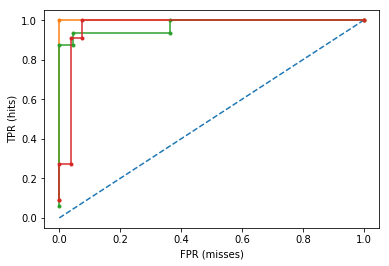

In [22]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
from matplotlib import pyplot

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

x_train, x_test, y_train, y_test = train_test_split(X,y)

# Get prediction (probability)
probs = lr.predict_proba(x_test)

# Plot 'no-skill' level
pyplot.plot([0, 1], [0, 1], linestyle='--')

# Iterate through each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], probs[:, i])   
    roc_auc = auc(fpr, tpr)
    
    # Plot the roc curve for each class
    pyplot.plot(fpr, tpr, marker='.')
    pyplot.xlabel('FPR (misses)')
    pyplot.ylabel('TPR (hits)')
    
# show the plot
pyplot.show()

## Precision-Recall Curves

**Precision** and **recall** are useful measures in machine learning for evaluating binary classification models.

*Precision* is a ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. Precision is also referred to as the positive predictive value.

$Precision = TP / (TP + FP)$

*Recall* is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives. Recall is the same as sensitivity.

$Recall = TP / (TP + FN)$

### What are they for?

Both precision and recall are useful in cases where there is an ***imbalance*** in the observations between the two classes. Specifically, there are many examples of no event (class 0) and only a few examples of an event (class 1).

The reason for this is that typically the large number of class 0 examples means we are less interested in the skill of the model at predicting class 0 correctly (i.e. high true negatives) and more interested in predicting class 1 correctly (i.e. high true positives).

>Key to the calculation of precision and recall is that the calculations do not make use of the true negatives. It is only concerned with the correct prediction of the minority class, class 1.

A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve.

A model with perfect skill is depicted as a point at [1.0,1.0]. A skillful model is represented by a curve that bows towards [1.0,1.0].

<img src="https://classeval.files.wordpress.com/2015/06/roc-precision-recall-one-to-one-relationship.png" style="width: 600px;"/>

### Summary
- ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
- Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.
- ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

[Source](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)